# **<center>Modelling** 

In [2]:
import os

from dotenv import load_dotenv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.layers import Dense #type: ignore

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from lime.lime_tabular import LimeTabularExplainer

from tqdm import tqdm

plt.style.use('dark_background')


In [3]:
# Show all the columns in the .head() method
pd.set_option('display.max_columns', None)

In [4]:
# Load in the dotenv variables
load_dotenv()

# Get the the path variable from dotenv
project_path = os.getenv('Project_Path')[2:78]

# Change notebook directory back one so that it can acess the data
os.chdir(project_path)

In [5]:
data = pd.read_csv('./data/processed/train.csv')

In [6]:
data.shape

(255720, 62)

In [7]:
data.head()

,loan_amnt,term,grade,annual_inc,pymnt_plan,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,dti_joint,tot_cur_bal,open_acc_6m,il_util,max_bal_bc,inq_last_12m,emp_type_Accountant,emp_type_Admin,emp_type_Analyst,emp_type_Assistant,emp_type_Clergy,emp_type_Clerk,emp_type_Designer,emp_type_Director,emp_type_Education,emp_type_Executive,emp_type_Healer,emp_type_Manager,emp_type_Operator,emp_type_Technical,emp_type_Vol,home_ownership_OTHER,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_major_purchase,purpose_other,purpose_small_business,purpose_wedding,addr_state_AL,addr_state_CO,addr_state_DC,addr_state_FL,addr_state_IL,addr_state_KS,addr_state_ME,addr_state_MS,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NV,addr_state_NY,addr_state_SC,addr_state_TX,addr_state_VA,frac
0,-1.156460,-0.654724,0.763889,-0.789014,-0.003357,0.305877,-0.335522,-0.145932,1.201140,-1.373775,-0.97077,-0.415561,0.302329,-0.107149,0.576897,-0.023957,-0.843347,-0.103891,-0.139209,-0.116273,-0.088306,-0.109205,-0.104843,-0.157505,-0.147428,-0.039637,-0.077757,-0.052789,-0.196448,-0.186479,-0.180873,-0.245189,-0.435078,-0.169413,-0.395006,-0.172517,-0.016276,1.2214,-0.768632,1.431317,1.817653,-0.140912,-0.225373,-0.108777,-0.051496,-0.113061,-0.147149,-0.052423,-0.271536,-0.204067,-0.094934,-0.024331,-0.065744,-0.02324,-0.036428,-0.069732,-0.119254,-0.301818,-0.110158,-0.295217,-0.174612,1.171905
1,-1.452829,1.527360,-0.314193,-0.696292,-0.003357,4.312132,-0.335522,-0.679268,-1.912396,-1.796028,-0.97077,-0.426398,-3.540893,-0.107149,0.576897,-0.023957,-0.843347,-0.103891,-0.139209,-0.116273,-0.088306,-0.109205,-0.104843,-0.157505,-0.147428,-0.039637,-0.077757,-0.052789,-0.196448,-0.186479,-0.180873,-0.245189,-0.435078,-0.169413,-0.395006,-0.172517,-0.016276,1.2214,1.301013,-0.698657,-0.550160,-0.140912,-0.225373,-0.108777,-0.051496,-0.113061,-0.147149,-0.052423,-0.271536,-0.204067,-0.094934,-0.024331,-0.065744,-0.02324,-0.036428,-0.069732,-0.119254,-0.301818,-0.110158,-0.295217,-0.174612,0.403643
2,-1.464683,-0.654724,-0.468204,-0.970563,-0.003357,1.307441,-0.335522,-0.622684,1.821333,-1.289324,-0.97077,-0.315809,0.302329,-0.107149,0.576897,-0.023957,-0.843347,-0.103891,-0.139209,-0.116273,-0.088306,-0.109205,-0.104843,-0.157505,-0.147428,-0.039637,-0.077757,-0.052789,-0.196448,-0.186479,-0.180873,-0.245189,-0.435078,-0.169413,-0.395006,-0.172517,-0.016276,1.2214,-0.768632,-0.698657,-0.550160,-0.140912,-0.225373,9.193151,-0.051496,-0.113061,-0.147149,-0.052423,-0.271536,4.900357,-0.094934,-0.024331,-0.065744,-0.02324,-0.036428,-0.069732,-0.119254,-0.301818,-0.110158,-0.295217,-0.174612,1.250750
3,-0.563724,-0.654724,0.147842,-0.399582,-0.003357,0.305877,-0.335522,-0.504878,-1.426299,0.990842,-0.97077,-0.376798,-1.344122,-0.107149,0.576897,-0.023957,-0.843347,-0.103891,-0.139209,-0.116273,-0.088306,-0.109205,-0.104843,-0.157505,-0.147428,-0.039637,-0.077757,-0.052789,-0.196448,-0.186479,-0.180873,-0.245189,-0.435078,-0.169413,-0.395006,-0.172517,-0.016276,1.2214,1.301013,-0.698657,-0.550160,-0.140912,4.437084,-0.108777,-0.051496,-0.113061,-0.147149,-0.052423,-0.271536,-0.204067,-0.094934,-0.024331,-0.065744,-0.02324,-0.036428,-0.069732,-0.119254,-0.301818,-0.110158,-0.295217,-0.174612,1.222458
4,-1.156460,-0.654724,1.225924,-0.603570,-0.003357,2.309004,-0.335522,-0.399424,-1.120393,-1.120423,-0.97077,-0.417770,-0.247992,-0.107149,0.576897,-0.023957,-0.843347,-0.103891,-0.139209,-0.116273,-0.088306,-0.109205,-0.104843,-0.157505,-0.147428,-0.039637,-0.077757,-0.052789,-0.196448,-0.186479,-0.180873,-0.245189,-0.435078,-0.169413,-0.395006,-0.172517,-0.016276,1.2214,1.301013,-0.698657,-0.550160,-0.140912,-0.225373,-0.108777,19.418825,-0.113061,-0.147149,-0.052423,-0.271536,-0.204067,-0.094934,-0.024331,-0.065744,-0.02324,-0.036428,-0.069732,-0.119254,-0.301818,-0.110158,-0.295217,-0

In [8]:
data['frac'].describe()

count    255720.000000
mean          1.014842
std           0.297824
min           0.000000
25%           1.031176
50%           1.102847
75%           1.175711
max           1.763947
Name: frac, dtype: float64

In [9]:
X = data.drop('frac', axis = 1)
y = data['frac']

In [10]:
X.shape

(255720, 61)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

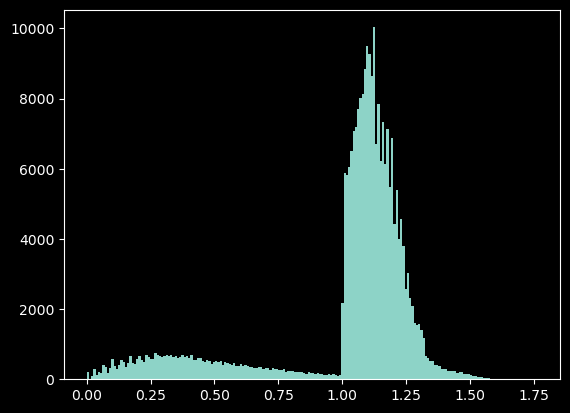

In [12]:
plt.hist(data = data, x = 'frac', bins = 200);

In [13]:
# Create a function that takes in the loss from the train_model as an argument
def loss_plot(loss, epochs):
    # Create a plot of the the epics and the losses for each epoch
    plt.plot(range(1, epochs + 1), loss);
    # Label the x-axis of the graph
    plt.xlabel("Epoch #");
    # Label the y-axis of the graph
    plt.ylabel("Cost");
    # Title the graph
    plt.title("Model Cost");
    # Show the plot inside of a function
    plt.show()

In [14]:
def tf_model(X_train, y_train, ep, b_s):
    # Initialize the model
    model = Sequential()

    # Create the first layer of the deep learning model with input set the number of features in X_train
    model.add(Dense(61, activation = 'relu', input_dim = X_train.shape[1]))
    # Add a middle layer to give the model more complexity
    model.add(Dense(61, activation = 'relu'))
    # Add a middle layer to give the model more complexity
    model.add(Dense(61, activation = 'relu'))
    # Add a middle layer to give the model more complexity
    model.add(Dense(61, activation = 'relu'))
    # Add a middle layer to give the model more complexity
    model.add(Dense(61, activation = 'relu'))
    # Add a middle layer to give the model more complexity
    model.add(Dense(61, activation = 'relu'))
    # Add a middle layer to give the model more complexity
    model.add(Dense(61, activation = 'relu'))
    # Add a middle layer to give the model more complexity
    model.add(Dense(61, activation = 'relu'))
    # Add a middle layer to give the model more complexity
    model.add(Dense(61, activation = 'relu'))
    # Add a middle layer to give the model more complexity
    model.add(Dense(53, activation = 'relu'))
    # Add a middle layer to give the model more complexity
    model.add(Dense(38, activation = 'relu'))
    # Add a middle layer to give the model more complexity
    model.add(Dense(25, activation = 'relu'))
    # Add a middle layer to give the model more complexity
    model.add(Dense(14, activation = 'relu'))
    # Finish with the same amount of nodes as categories that there are to predict
    model.add(Dense(1, activation = 'linear'))
    # Compile the network with the standard optimiizer and loss function
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
    # Train the model with X_train and the encoded categorical y_group
    history = model.fit(X_train.astype('float32'), y_train, epochs = ep, batch_size = b_s)
    # Store the losses in a variable
    losses = history.history['loss']
    loss_plot(losses, int(ep))
    
    return model

Epoch 1/10
39/39 [==============================] - 4s 55ms/step - loss: 0.4190 - mean_absolute_error: 0.5192
Epoch 2/10
39/39 [==============================] - 3s 63ms/step - loss: 0.0863 - mean_absolute_error: 0.2198
Epoch 3/10
39/39 [==============================] - 3s 86ms/step - loss: 0.0736 - mean_absolute_error: 0.1995
Epoch 4/10
39/39 [==============================] - 3s 75ms/step - loss: 0.0677 - mean_absolute_error: 0.1891
Epoch 5/10
39/39 [==============================] - 3s 85ms/step - loss: 0.0619 - mean_absolute_error: 0.1775
Epoch 6/10
39/39 [==============================] - 3s 80ms/step - loss: 0.0571 - mean_absolute_error: 0.1659
Epoch 7/10
39/39 [==============================] - 3s 85ms/step - loss: 0.0536 - mean_absolute_error: 0.1562
Epoch 8/10
39/39 [==============================] - 2s 60ms/step - loss: 0.0513 - mean_absolute_error: 0.1493
Epoch 9/10
39/39 [==============================] - 2s 41ms/step - loss: 0.0495 - mean_absolute_error: 0.1434
Epoch 10/1

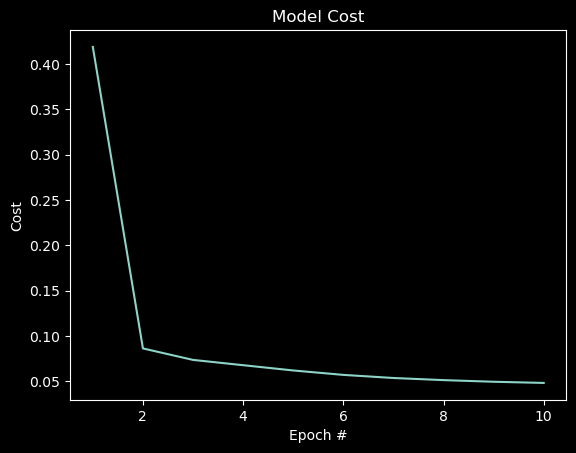

In [15]:
neural_net = tf_model(X_train, y_train, 10, 5000)

Fold 1/5
Epoch 1/5
31/31 [==============================] - 3s 44ms/step - loss: 0.4840 - mean_absolute_error: 0.5763
Epoch 2/5
31/31 [==============================] - 1s 31ms/step - loss: 0.1026 - mean_absolute_error: 0.2449
Epoch 3/5
31/31 [==============================] - 2s 52ms/step - loss: 0.0781 - mean_absolute_error: 0.2065
Epoch 4/5
31/31 [==============================] - 2s 63ms/step - loss: 0.0728 - mean_absolute_error: 0.1979
Epoch 5/5
31/31 [==============================] - 2s 57ms/step - loss: 0.0693 - mean_absolute_error: 0.1920


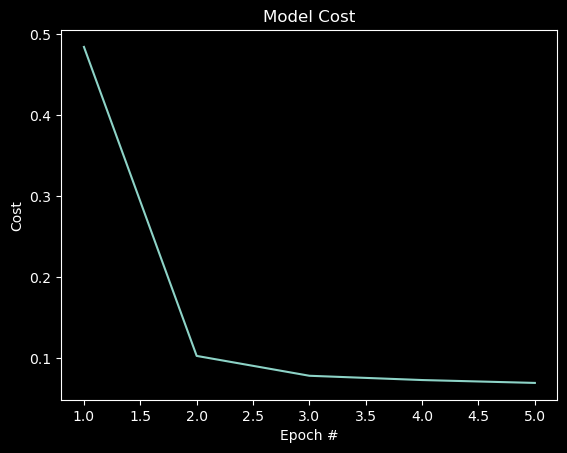

1199/1199 [==============================] - 3s 3ms/step
Train MSE: 0.0671 - Validation MSE: 0.0692 - Validation MAE: 0.1882 - Mean Percent Error: 19.1326%

Fold 2/5
Epoch 1/5
31/31 [==============================] - 3s 68ms/step - loss: 0.3796 - mean_absolute_error: 0.4964
Epoch 2/5
31/31 [==============================] - 2s 79ms/step - loss: 0.0950 - mean_absolute_error: 0.2339
Epoch 3/5
31/31 [==============================] - 3s 86ms/step - loss: 0.0789 - mean_absolute_error: 0.2092
Epoch 4/5
31/31 [==============================] - 2s 68ms/step - loss: 0.0743 - mean_absolute_error: 0.2019
Epoch 5/5
31/31 [==============================] - 2s 80ms/step - loss: 0.0706 - mean_absolute_error: 0.1951


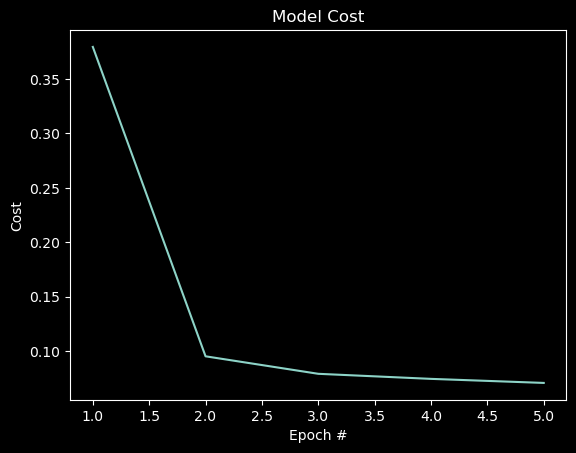

1199/1199 [==============================] - 3s 2ms/step
Train MSE: 0.0684 - Validation MSE: 0.0677 - Validation MAE: 0.1904 - Mean Percent Error: 19.4562%

Fold 3/5
Epoch 1/5
31/31 [==============================] - 4s 92ms/step - loss: 0.4073 - mean_absolute_error: 0.5099
Epoch 2/5
31/31 [==============================] - 2s 66ms/step - loss: 0.1014 - mean_absolute_error: 0.2399
Epoch 3/5
31/31 [==============================] - 3s 91ms/step - loss: 0.0796 - mean_absolute_error: 0.2077
Epoch 4/5
31/31 [==============================] - 2s 78ms/step - loss: 0.0728 - mean_absolute_error: 0.1965
Epoch 5/5
31/31 [==============================] - 2s 68ms/step - loss: 0.0684 - mean_absolute_error: 0.1886


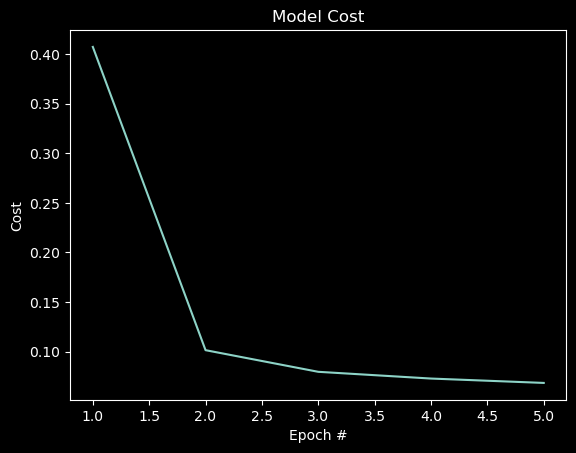

1199/1199 [==============================] - 3s 2ms/step
Train MSE: 0.0662 - Validation MSE: 0.0669 - Validation MAE: 0.1870 - Mean Percent Error: 19.1177%

Fold 4/5
Epoch 1/5
31/31 [==============================] - 4s 69ms/step - loss: 0.3952 - mean_absolute_error: 0.5068
Epoch 2/5
31/31 [==============================] - 2s 73ms/step - loss: 0.0926 - mean_absolute_error: 0.2316
Epoch 3/5
31/31 [==============================] - 2s 65ms/step - loss: 0.0779 - mean_absolute_error: 0.2076
Epoch 4/5
31/31 [==============================] - 2s 73ms/step - loss: 0.0737 - mean_absolute_error: 0.2000
Epoch 5/5
31/31 [==============================] - 2s 74ms/step - loss: 0.0702 - mean_absolute_error: 0.1941


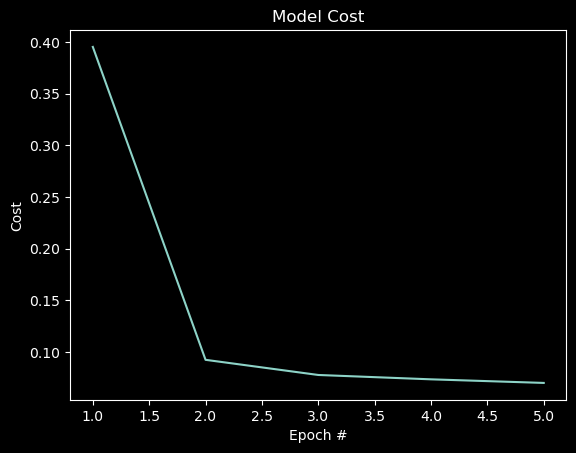

1199/1199 [==============================] - 3s 2ms/step
Train MSE: 0.0681 - Validation MSE: 0.0692 - Validation MAE: 0.1920 - Mean Percent Error: 19.5504%

Fold 5/5
Epoch 1/5
31/31 [==============================] - 4s 90ms/step - loss: 0.3714 - mean_absolute_error: 0.4790
Epoch 2/5
31/31 [==============================] - 3s 92ms/step - loss: 0.0927 - mean_absolute_error: 0.2316
Epoch 3/5
31/31 [==============================] - 2s 68ms/step - loss: 0.0763 - mean_absolute_error: 0.2028
Epoch 4/5
31/31 [==============================] - 2s 68ms/step - loss: 0.0715 - mean_absolute_error: 0.1951
Epoch 5/5
31/31 [==============================] - 2s 56ms/step - loss: 0.0672 - mean_absolute_error: 0.1866


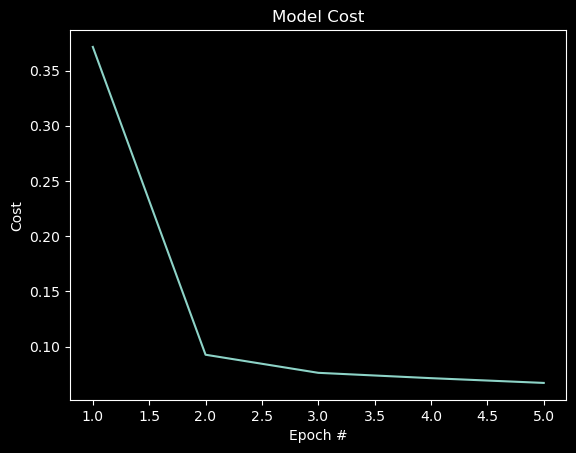

1199/1199 [==============================] - 3s 2ms/step
Train MSE: 0.0646 - Validation MSE: 0.0653 - Validation MAE: 0.1829 - Mean Percent Error: 18.9132%

Average Validation MSE: 0.0677


In [16]:
# Assuming X_train and y_train are Pandas DataFrames
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Set the number of folds
num_folds = 5

# Initialize KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create lists to store training and validation MSE for each fold
train_mse_list = []
val_mse_list = []

# Convert DataFrames to NumPy arrays
X_train_values = X_train.values
y_train_values = y_train.values

# Iterate over folds
for fold, (train_index, val_index) in enumerate(kf.split(X_train_values)):
    print(f"Fold {fold + 1}/{num_folds}")
    
    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train_values[train_index], X_train_values[val_index]
    y_train_fold, y_val_fold = y_train_values[train_index], y_train_values[val_index]
    
    # Create the model
    model = tf_model(X_train_fold, y_train_fold, 5, 5000)
    
    # Evaluate the model on training and validation sets
    train_preds = model.predict(X_train_fold)
    val_preds = model.predict(X_val_fold)
    
    train_mse = mean_squared_error(y_train_fold, train_preds)
    val_mse = mean_squared_error(y_val_fold, val_preds)
    val_mae = mean_absolute_error(y_val_fold, val_preds)
    per_error = np.mean((val_mae / val_preds) * 100)
    
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)
    
    print(f"Train MSE: {train_mse:.4f} - Validation MSE: {val_mse:.4f} - Validation MAE: {val_mae:.4f} - Mean Percent Error: {per_error:.4f}%\n")

# Calculate the average validation MSE across all folds
avg_val_mse = np.mean(val_mse_list)
print(f"Average Validation MSE: {avg_val_mse:.4f}")


In [17]:
# Run the model and store the predictions in preds
preds = neural_net.predict(X_test)
# Calculate the mean_squared_error
mse = mean_squared_error(y_test, preds)
# Calculate the mean_absolute_error
mae = mean_absolute_error(y_test, preds)
# Calculate the percentage of the prediction the error contained
per_error = np.mean((mae / preds) * 100)

1998/1998 [==============================] - 5s 2ms/step


MSE: 0.0653 - MAE: 0.1829 - Mean Percent Error: 14.2569%



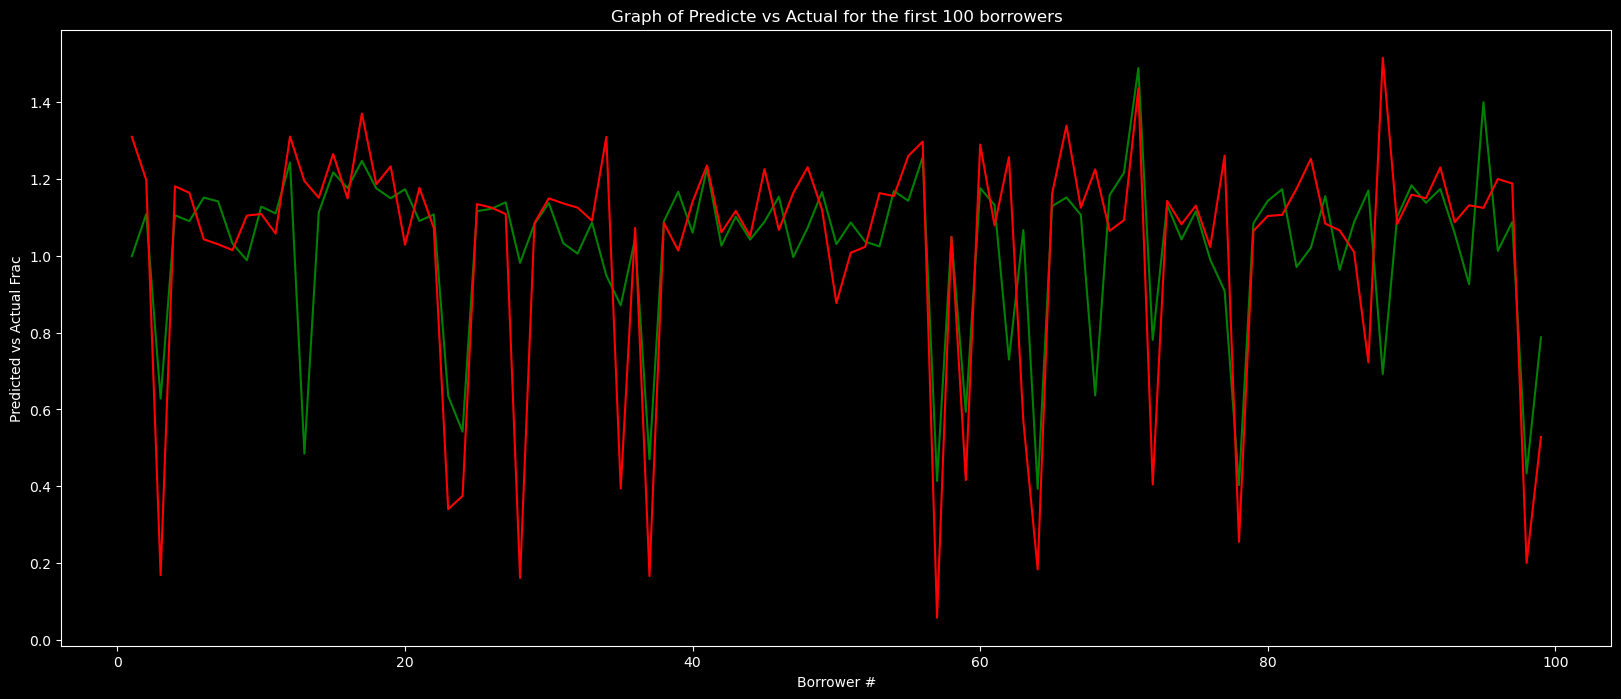

In [18]:
print(f"MSE: {val_mse:.4f} - MAE: {val_mae:.4f} - Mean Percent Error: {per_error:.4f}%\n")
plt.figure(figsize = (20,8))
plt.plot(range(1, 100), preds[:99], c = 'green');
plt.plot(range(1, 100), y_test[:99], c = 'red');
plt.xlabel('Borrower #');
plt.ylabel('Predicted vs Actual Frac');
plt.title("Graph of Predicte vs Actual for the first 100 borrowers");

In [19]:
X_train.index

RangeIndex(start=0, stop=191790, step=1)

In [20]:
explainer = LimeTabularExplainer(training_data = X_train,
                                 mode='regression', 
                                 feature_names = X_train.columns,
                                 discretize_continuous = False)

In [22]:
def lime_explanation(loan_number):

    # Instance you want to explain (should match the features of X_train)
    instance_to_explain = X_train.iloc[loan_number]

    # Define a predict function that takes an array of instances and returns predictions
    def predict_fn(instances):
        return model.predict(instances)  # Replace 'your_model' with your trained model

    # Generate explanation
    explanation = explainer.explain_instance(instance_to_explain, predict_fn)

    explanation.show_in_notebook()

In [24]:
lime_explanation(5993)

157/157 [==============================] - 0s 3ms/step


In [26]:
print(np.array(y_test))
print(np.array(preds))


[1.11670306 1.07664076 1.02475868 ... 1.09558414 1.09970585 0.70207595]
[[1.017808  ]
 [1.1098822 ]
 [1.1191547 ]
 ...
 [0.88118184]
 [1.038273  ]
 [0.55120707]]


In [30]:
diff = [preds[i] - y_test for i, y_test in enumerate(y_test)]
max(diff)

array([1.1631162], dtype=float32)

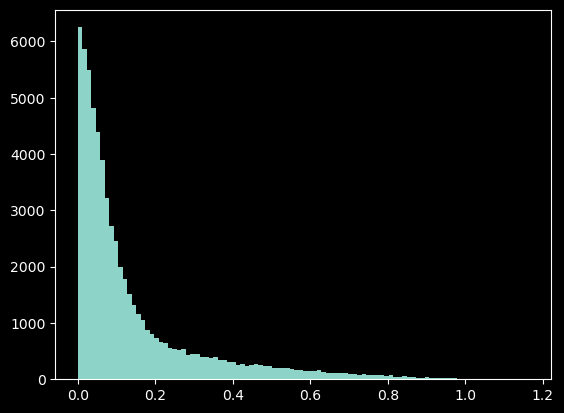

In [53]:
plt.hist(abs(np.array(diff)), bins = 100);

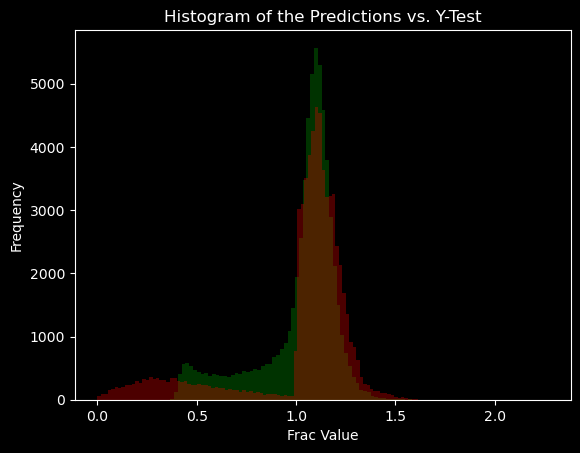

In [41]:
plt.hist(preds, bins = 100, color = 'green', alpha = .4);
plt.hist(y_test, bins = 100, color = 'red', alpha = .3);
plt.xlabel("Frac Value");
plt.ylabel("Frequency");
plt.title("Histogram of the Predictions vs. Y-Test");

In [44]:
# Initialize a random forest model
rf = RandomForestRegressor(n_jobs = 4)
# Create a set of values to search
param_grid = {'n_estimators': [5, 50, 100, 150, 200, 300, 600]}  
# Create the grid search object with 5 cross validational folds
grid_search = GridSearchCV(rf, param_grid, cv = 2, verbose = 1)  
# Fit the data to the grid search
grid_search.fit(X_train, y_train)
# Save the best parameters  
best_params = grid_search.best_params_
# Print the best parameters
best_params

Fitting 2 folds for each of 7 candidates, totalling 14 fits


{'n_estimators': 600}

In [25]:
# Create a random forest classifier with the best parameters trees
rf = RandomForestRegressor(n_estimators= 600, n_jobs = 4)

# Fit the model to the data
rf.fit(X_train, y_train)

# Predict the test set
rf_pred = rf.predict(X_test)

# Calculate the mean_squared_error
rf_mse = mean_squared_error(y_test, rf_pred)
# Calculate the mean_absolute_error
rf_mae = mean_absolute_error(y_test, rf_pred)
# Calculate the percentage of the prediction the error contained
rf_per_error = np.mean((mae / rf_pred) * 100)

C:\Users\jdrel\AppData\Local\Temp\ipykernel_13328\4040340364.py:15: RuntimeWarning: divide by zero encountered in divide
  rf_per_error = np.mean((mae / rf_pred) * 100)


In [46]:
print(f"MSE: {rf_mse:.4f} - MAE: {rf_mae:.4f} - Mean Percent Error: {rf_per_error:.4f}%\n")

MSE: 0.0307 - MAE: 0.0864 - Mean Percent Error: 17.0258%



In [ ]:

plt.figure(figsize = (20,8))
plt.plot(range(1, 100), rf_pred[:99], c = 'green');
plt.plot(range(1, 100), y_test[:99], c = 'red');
plt.xlabel('Borrower #');
plt.ylabel('Predicted vs Actual Frac');
plt.title("Graph of Predicte vs Actual for the first 100 borrowers");